
Latent Dirichlet allocation (LDA)
----

<center><img src="images/lda_hipster.png" width="80%"/></center>

[Source](https://twitter.com/ml_hipster/status/381914112227147777)

By the end of this session, you should be able to:
----

- Explain what is Latent Dirichlet allocation (LDA) is in your own words
- Draw the LDA model with parameters and text components
- Discuss how to evaluate LDA

Suppose you have the following set of sentences:

1. I ate a banana and spinach smoothie for breakfast.  
2. I like to eat broccoli and bananas.  
3. Chinchillas and kittens are cute.  
4. My sister adopted a kitten yesterday.  
5. Look at this cute hamster munching on a piece of broccoli.  

Sentences 1 and 2: 100% Topic A  
Sentences 3 and 4: 100% Topic B  
Sentence 5: 60% Topic A, 40% Topic B  


Suppose you have the following set of sentences:

1. I ate a banana and spinach smoothie for breakfast.  
2. I like to eat broccoli and bananas.  
3. Chinchillas and kittens are cute.  
4. My sister adopted a kitten yesterday.  
5. Look at this cute hamster munching on a piece of broccoli.  

Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, ...   
(at which point, you could interpret topic A to be about food)  
Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, ...  
(at which point, you could interpret topic B to be about cute animals)  

[Source](https://www.quora.com/What-is-a-good-explanation-of-Latent-Dirichlet-Allocation)

What is Latent Dirichlet allocation (LDA)?
---

LDA is a way of automatically discovering topics.

LDA is a generative probabilistic model for collections of discrete data. 

Text data is an ideal candidate for LDA (but not the only domain).

[Source](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)

<center><img src="images/probablistic_models.png" width="75%"/></center>

<center><img src="images/gen_model_text.png" width="700"/></center>

<center><img src="images/over_words.png" width="700"/></center>

LDA Assumptions
----

In reality, we __only__ observe the documents (aka, the data).
We must infere other structures, (aka, the parameters) and compute their distribution conditioned on the documents:

`p(topics, proportions, assignments|documents)`

Different ways to representation LDA 
-----

1. Plate model
1. Written description
1. Applied example
1. Formal equations
1. Pictural

(Pick your favorite)

<center><img src="images/lda_plate2.png" width="100%"/></center>

LDA assumptions
-----

- There are K topics shared by the collection.
- Each document exhibits the topics with different proportions. 
- Each word is drawn from one topic in each document.
- We discover the structure that best explain a corpus.

Plate Figure sidebar
----

<center><img src="images/plate_diagrams.png" width="25%"/></center>

3 Levels of LDA
---

<center><img src="images/lda_plate2.png" width="75%"/></center>

1. The parameters α and β are corpus-level parameters, assumed to be sampled once in the process of generating a corpus.   
2. The variables $θ_d$ and phi are document-level variables, sampled once per document.  
3. The variables $z_dn$ and $w_dn$ are word-level variables and are sampled once for each word.

<center><img src="images/joint.png" width="100%"/></center>

LDA Example
----

<center><img src="images/lda_example.png" width="75%"/></center>

LDA: Deeper Dive
---

<center><img src="images/lda_text.png" width="65%"/></center>



<center><img src="images/lda_model.png" width="100%"/></center>

LDA represents documents as mixtures of topics that emit words with certain probabilities. 

LDA can generative new data points
------

Documents are produced in the following way: 

- Creating a document decide on the number of words N the document will have (say, according to a Poisson distribution)

- Choose a topic mixture for the document (according to a Dirichlet distribution over a fixed set of K topics). For example, a document is 1/3 one topic and 2/3 other topic

- Generate each word in the document by:
    1. Picking a topic (according to the multinomial distribution that you sampled above). For example, you might pick one topic with 1/3 probability and another topic with 2/3 probability.
    3. Then using the topic to generate the word itself (according to the topic's multinomial distribution). For example, a food topic might output the word "broccoli" with 30% probability, "bananas" with 15% probability, ...

Assuming this generative model for a collection of documents, LDA then tries to backtrack from the documents to find a set of topics that are likely to have generated the collection.

Multinomial distribution
-----



A generalization of the binomial distribution

A sequence of independent, identically distributed random variables each taking k possible discrete values



<center><img src="images/multinomial.png" width="700"/></center>

The probability mass for each possible combination of 2 outcomes



Dirichlet Distribution
-----

The Dirichlet distribution is a probability distribution over the space of multinomial distributions.

We have introduced one level of indirection in the model, instead of saying directly what generated the model, we choose the hyperparameters which dictate what probability distributions are likely to occur, and then draw samples  according to the random variables.

[Source](https://www.quora.com/What-is-an-intuitive-explanation-of-the-Dirichlet-distribution)

Dirichlet Distribution: Probability density function (pdf)
-----

<center><img src="images/Dirichlet-3d-panel.png" width="700"/></center>

Dirichlet Distribution
-----

<center><img src="images/formula.png" width="700"/></center>

- $α_i$ are parameters
- [simplex](https://en.wikipedia.org/wiki/Simplex) is a constraint

<center><img src="images/joint.png" width="700"/></center>

The Generative Process
------

- For each topic 1..k:
    - Draw a multinomial over words $β_k ~ Dir(η)$
- For each document 1..d:
    - Draw a multinomial over topics $Θ_d ~ Dir(α)$
    - For each word $w_{d,n}$:
        - Draw a topic $Z_{d,n} ~ Mult(Θ_d)$
        - Draw a word  $w_{d,n} ~ Mult(β_{Zk_d})$

Draw means sample from a distribution.

Geometric Interpretation of LDA
-------

<center><img src="images/geo_interpretation.png" width="35%"/></center>

<center><img src="images/dirichlet_wieghts.png" width="70%"/></center>

Evaluating LDA
----

Given that topic modeling is a version of clustering, it is more difficult and nuanced to evaluate model performance.



LDA is typically evaluated by either measuring performance on some secondary task, such as document classification or information retrieval, or by estimating the probability of unseen held-out documents given some training documents.

[Source](http://mimno.infosci.cornell.edu/papers/wallach09evaluation.pdf)

Check for understanding
---

In what contexts would LDA __not__ work well and why?

1. The documents are too short (e.g., tweets, queries)  
2. There are too few documents (e.g., Shakespeare’s plays)  
3. Document contains many topics (e.g., books)  
4. Each document is only "truly" about one topic.  
5. There are less than k topics in the corpus. The model will overfit.  

[Source](http://jmlr.org/proceedings/papers/v32/tang14.pdf)

Limitations of LDA
---

<center><img src="images/theory.jpeg" width="75%"/></center>

LDA works well in practice. 

However it lacks formal proofs and optimization guarantees on parameter estimation.



[Source](http://jmlr.org/proceedings/papers/v32/tang14.pdf)

Building Data Products with LDA
----

<center><img src="images/sentiment_by_topic.png" width="75%"/></center>

OpenTable finds the sentiment (classification) for LDA topics (clustering) to help better understand restaurants for their users.

What is topic modeling? (redux)
----

> A topic is a probability distribution over the vocabulary

or

> Documents are mixtures of topics, where a topic is a probability distribution over words.



per cognitive scientists Mark Steyvers and Tom Griffiths.

Summary
----

- LDA is a graphic Bayesian unsupervised learning model to find topics in discrete data, most often text.
- We discover the structure that best explain a corpus by:
    - Assuming there are K topics shared by the collection.
    - Each document exhibits the topics with different proportions.
    - Each word is drawn from one topic.
- LDA is practical algorithm to explore and recommend documents

Disclaimer
-----

![](http://tclhost.com/ZyIat1D.gif)

In __no__ way have I prepared to fully undertand LDA nor could RYO LDA.

I have laid a fundation for you to understand, apply, and interpert LDA.

We don't cover parameter estimatation / learning. That requires Gibbs Sampling.

MOM, MLE, or MAP __won't__ work.

<br>
<br> 
<br>

----

Further Study
----

[LDA applied to xkcd comics](http://cpsievert.github.io/projects/615/xkcd/)

[Machine Learning: A Probabilistic Perspective](https://mitpress.mit.edu/books/machine-learning-0) has detailed coverage of LDA

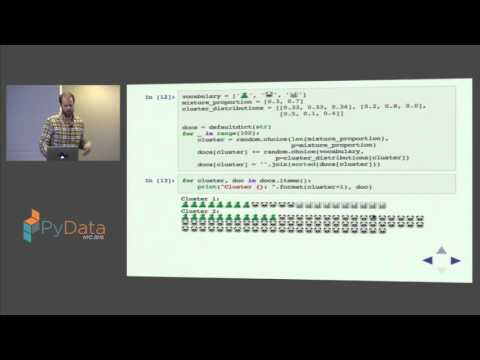

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("_R66X_udxZQ")

- https://github.com/tdhopper/pydata-nyc-2015
- https://github.com/tdhopper/notes-on-dirichlet-processes

Model how Topics change over Time: Dynamic Topic Modeling
-----

Change Drichlet Distrubtion to Dirchelet Process.

A stochastic process is a probability model used to describe phenomena that evolve over __time__ or space. 

More specifically, in probability theory, a stochastic process is a time sequence representing the evolution of some system represented by a variable whose change is subject to a random variation.

A statistical distribution is a snapshot. A statistical process is movie.

[Learn more](https://mimno.infosci.cornell.edu/info6150/readings/dynamic_topic_models.pdf)

[Source](https://en.wikipedia.org/wiki/Stochastic_process)

<br>
<br>
<br>

----